In [2]:
from urllib.request import urlopen , Request
from bs4 import BeautifulSoup
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

In [3]:
finv_url="https://finviz.com/quote.ashx?t="
tail="&p=d"
tickers=['AAPL','AMZN','AMD','META','MSFT','GOOGL','JNJ','JPM']
news_tables={}
for ticker in tickers:
    url=finv_url+ticker+tail
    req = Request(url=url,headers={'user-agent':'my-app'})
    response=urlopen(req)
    html = BeautifulSoup(response,'html')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table
print(news_tables)


{'AAPL': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr class="cursor-pointer" onclick="trackAndOpenNews(event, 'Reuters', 'https://finance.yahoo.com/news/apple-faces-1-billion-uk-220447693.html');">
<td align="right" width="130">
            Jul-24-23 06:04PM
        </td>
<td align="left">
<div class="news-link-container">
<div class="news-link-left">
<a class="tab-link-news" href="https://finance.yahoo.com/news/apple-faces-1-billion-uk-220447693.html" rel="nofollow" target="_blank">Apple faces $1 billion UK lawsuit by apps developers over app store fees</a>
</div>
<div class="news-link-right">
<span>(Reuters)</span></div></div></td></tr>
<tr class="cursor-pointer" onclick="trackAndOpenNews(event, 'Reuters', 'https://finance.yahoo.com/news/apple-faces-1-bln-uk-220100837.html');">
<td align="right" width="130">
            06:01PM
        </td>
<td align="left">
<div class="news-link-container">
<div class="news-link-lef

In [4]:
parsed_data = []
for ticker,news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title=row.a.get_text()
        date_data=row.td.text.split()
        if len(date_data)==1:
            time = date_data[0]
        else:
            date=date_data[0]
            time=date_data[1]
        parsed_data.append([ticker,date,time,title])
print(parsed_data)

[['AAPL', 'Jul-24-23', '06:04PM', 'Apple faces $1 billion UK lawsuit by apps developers over app store fees'], ['AAPL', 'Jul-24-23', '06:01PM', 'Apple faces $1 bln UK lawsuit by apps developers over app store fees'], ['AAPL', 'Jul-24-23', '05:45PM', 'Apple (AAPL) Outpaces Stock Market Gains: What You Should Know'], ['AAPL', 'Jul-24-23', '04:43PM', "Warren Buffett Stocks: What's Inside Berkshire Hathaway's Portfolio?"], ['AAPL', 'Jul-24-23', '01:13PM', 'These 3 Music Streaming Services Have All Announced Price Hikes. Is Spotify Next?'], ['AAPL', 'Jul-24-23', '11:51AM', 'Instagram boss Adam Mosseri rates Android better than Apples iOS in a Threads hot take'], ['AAPL', 'Jul-24-23', '11:21AM', 'Apple Scores 2 Higher Price Targets. The iPhone Isnt Why.'], ['AAPL', 'Jul-24-23', '11:19AM', "Apple's AI Plans Are Bigger Than You Think"], ['AAPL', 'Jul-24-23', '11:02AM', "Mattel's 'Barbie' premiere, Tesla downgrade, Apple iPhone: Trending stocks"], ['AAPL', 'Jul-24-23', '10:20AM', "AI hype is 'd

In [5]:
df = pd.DataFrame(parsed_data,columns=['Ticker','Date','Time','Title'])
vader=SentimentIntensityAnalyzer()
df['Compound_Score']=df['Title'].apply(lambda title: vader.polarity_scores(title)['compound'])
df['Date']=pd.to_datetime(df.Date).dt.date

In [6]:
df

,Ticker,Date,Time,Title,Compound_Score
0,AAPL,2023-07-24,06:04PM,Apple faces $1 billion UK lawsuit by apps deve...,-0.2263
1,AAPL,2023-07-24,06:01PM,Apple faces $1 bln UK lawsuit by apps develope...,-0.2263
2,AAPL,2023-07-24,05:45PM,Apple (AAPL) Outpaces Stock Market Gains: What...,0.3400
3,AAPL,2023-07-24,04:43PM,Warren Buffett Stocks: What's Inside Berkshire...,0.0000
4,AAPL,2023-07-24,01:13PM,These 3 Music Streaming Services Have All Anno...,0.0000
...,...,...,...,...,...
795,JPM,2023-07-14,01:36PM,UK braced for recession as job vacancies plung...,-0.4215
796,JPM,2023-07-14,01:34PM,Your Guide to Second-Quarter Bank Earnings,0.0000
797,JPM,2023-07-14,01:30PM,Brazil Treasury taps banks to help with sustai...,0.5423
798,JPM,2023-07-14,01:07PM,What big bank earnings reveal about the health...,0.0000


In [7]:
mean_df=df.groupby(['Ticker','Date']).mean()
mean_df=mean_df.unstack()
mean_df=mean_df.xs('Compound_Score',axis='columns').transpose()

C:\Users\paras\AppData\Local\Temp\ipykernel_24436\1423484450.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df=df.groupby(['Ticker','Date']).mean()


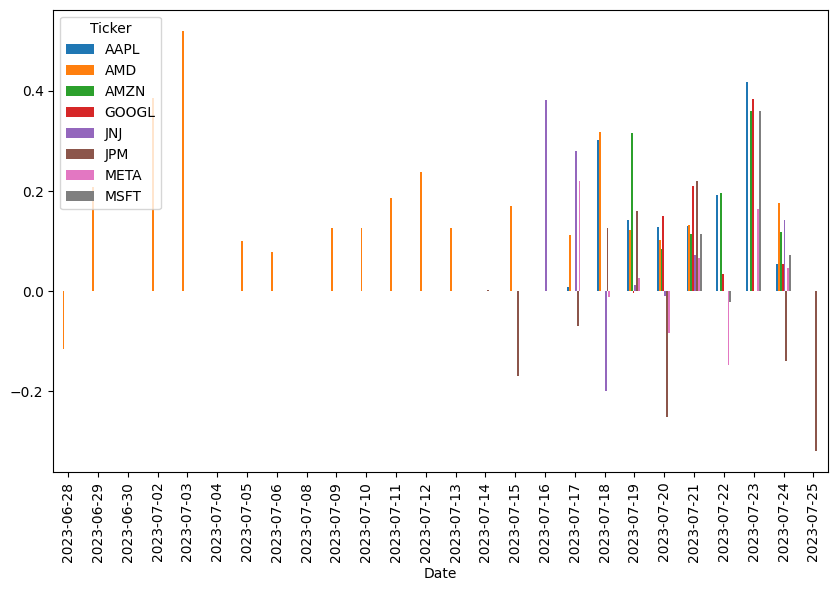

In [8]:

mean_df.plot(kind='bar',figsize=[10,6])
plt.show()